# Polynomial Regression Model

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
x=df[["Level"]]  # -->independent
y=df["Salary"]

Text(0, 0.5, 'salary')

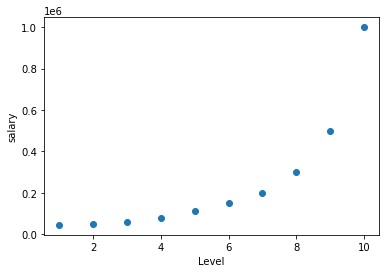

In [11]:
plt.scatter(x,y)
plt.xlabel("Level")
plt.ylabel("salary")

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
# step 3
lin_model=LinearRegression()
lin_model.fit(x,y)

LinearRegression()

In [21]:
ypred=lin_model.predict(x)

In [22]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,45000,-114454.545455
1,50000,-33575.757576
2,60000,47303.030303
3,80000,128181.818182
4,110000,209060.606061
5,150000,289939.393939
6,200000,370818.181818
7,300000,451696.969697
8,500000,532575.757576
9,1000000,613454.545455


In [23]:
lin_model.score(x,y)

0.6690412331929895

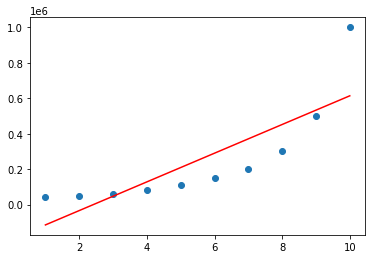

In [24]:
plt.scatter(x,y)
plt.plot(x,ypred,color="r")

In [25]:
x=df[["Level"]]  # -->independent
y=df["Salary"]

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans=PolynomialFeatures(degree=4)
x_poly=poly_trans.fit_transform(x)

In [38]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [39]:
poly_model=LinearRegression()
poly_model.fit(x_poly,y)

LinearRegression()

In [40]:
ypred=poly_model.predict(x_poly)

In [41]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496504
7,300000,289994.172494
8,500000,528694.638694
9,1000000,988916.083916


In [42]:
poly_model.score(x_poly,y)

0.9973922891706614

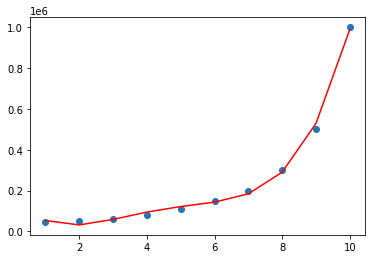

In [43]:
plt.scatter(x,y)
plt.plot(x,ypred,color="r")

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
from sklearn.pipeline import Pipeline
my_flow=Pipeline([("normalize_scaler",MinMaxScaler()),("model",LinearRegression())])

In [46]:
model=my_flow.fit(x,y)

In [47]:
model.score(x,y)

0.6690412331929896

In [48]:
model.predict(x)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [57]:
from sklearn.pipeline import Pipeline
my_flow=Pipeline([("polynomial",PolynomialFeatures(degree=4)),("model",LinearRegression())])

In [58]:
model=my_flow.fit(x,y)

In [59]:
model.score(x,y)

0.9973922891706614

In [60]:
model.predict(x)

array([ 53356.64335691,  31759.90676   ,  58642.19114225,  94632.86713296,
       121724.94172506, 143275.05827517, 184003.49650353, 289994.17249408,
       528694.63869438, 988916.08391567])

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Bodyfat_1.csv")
df

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


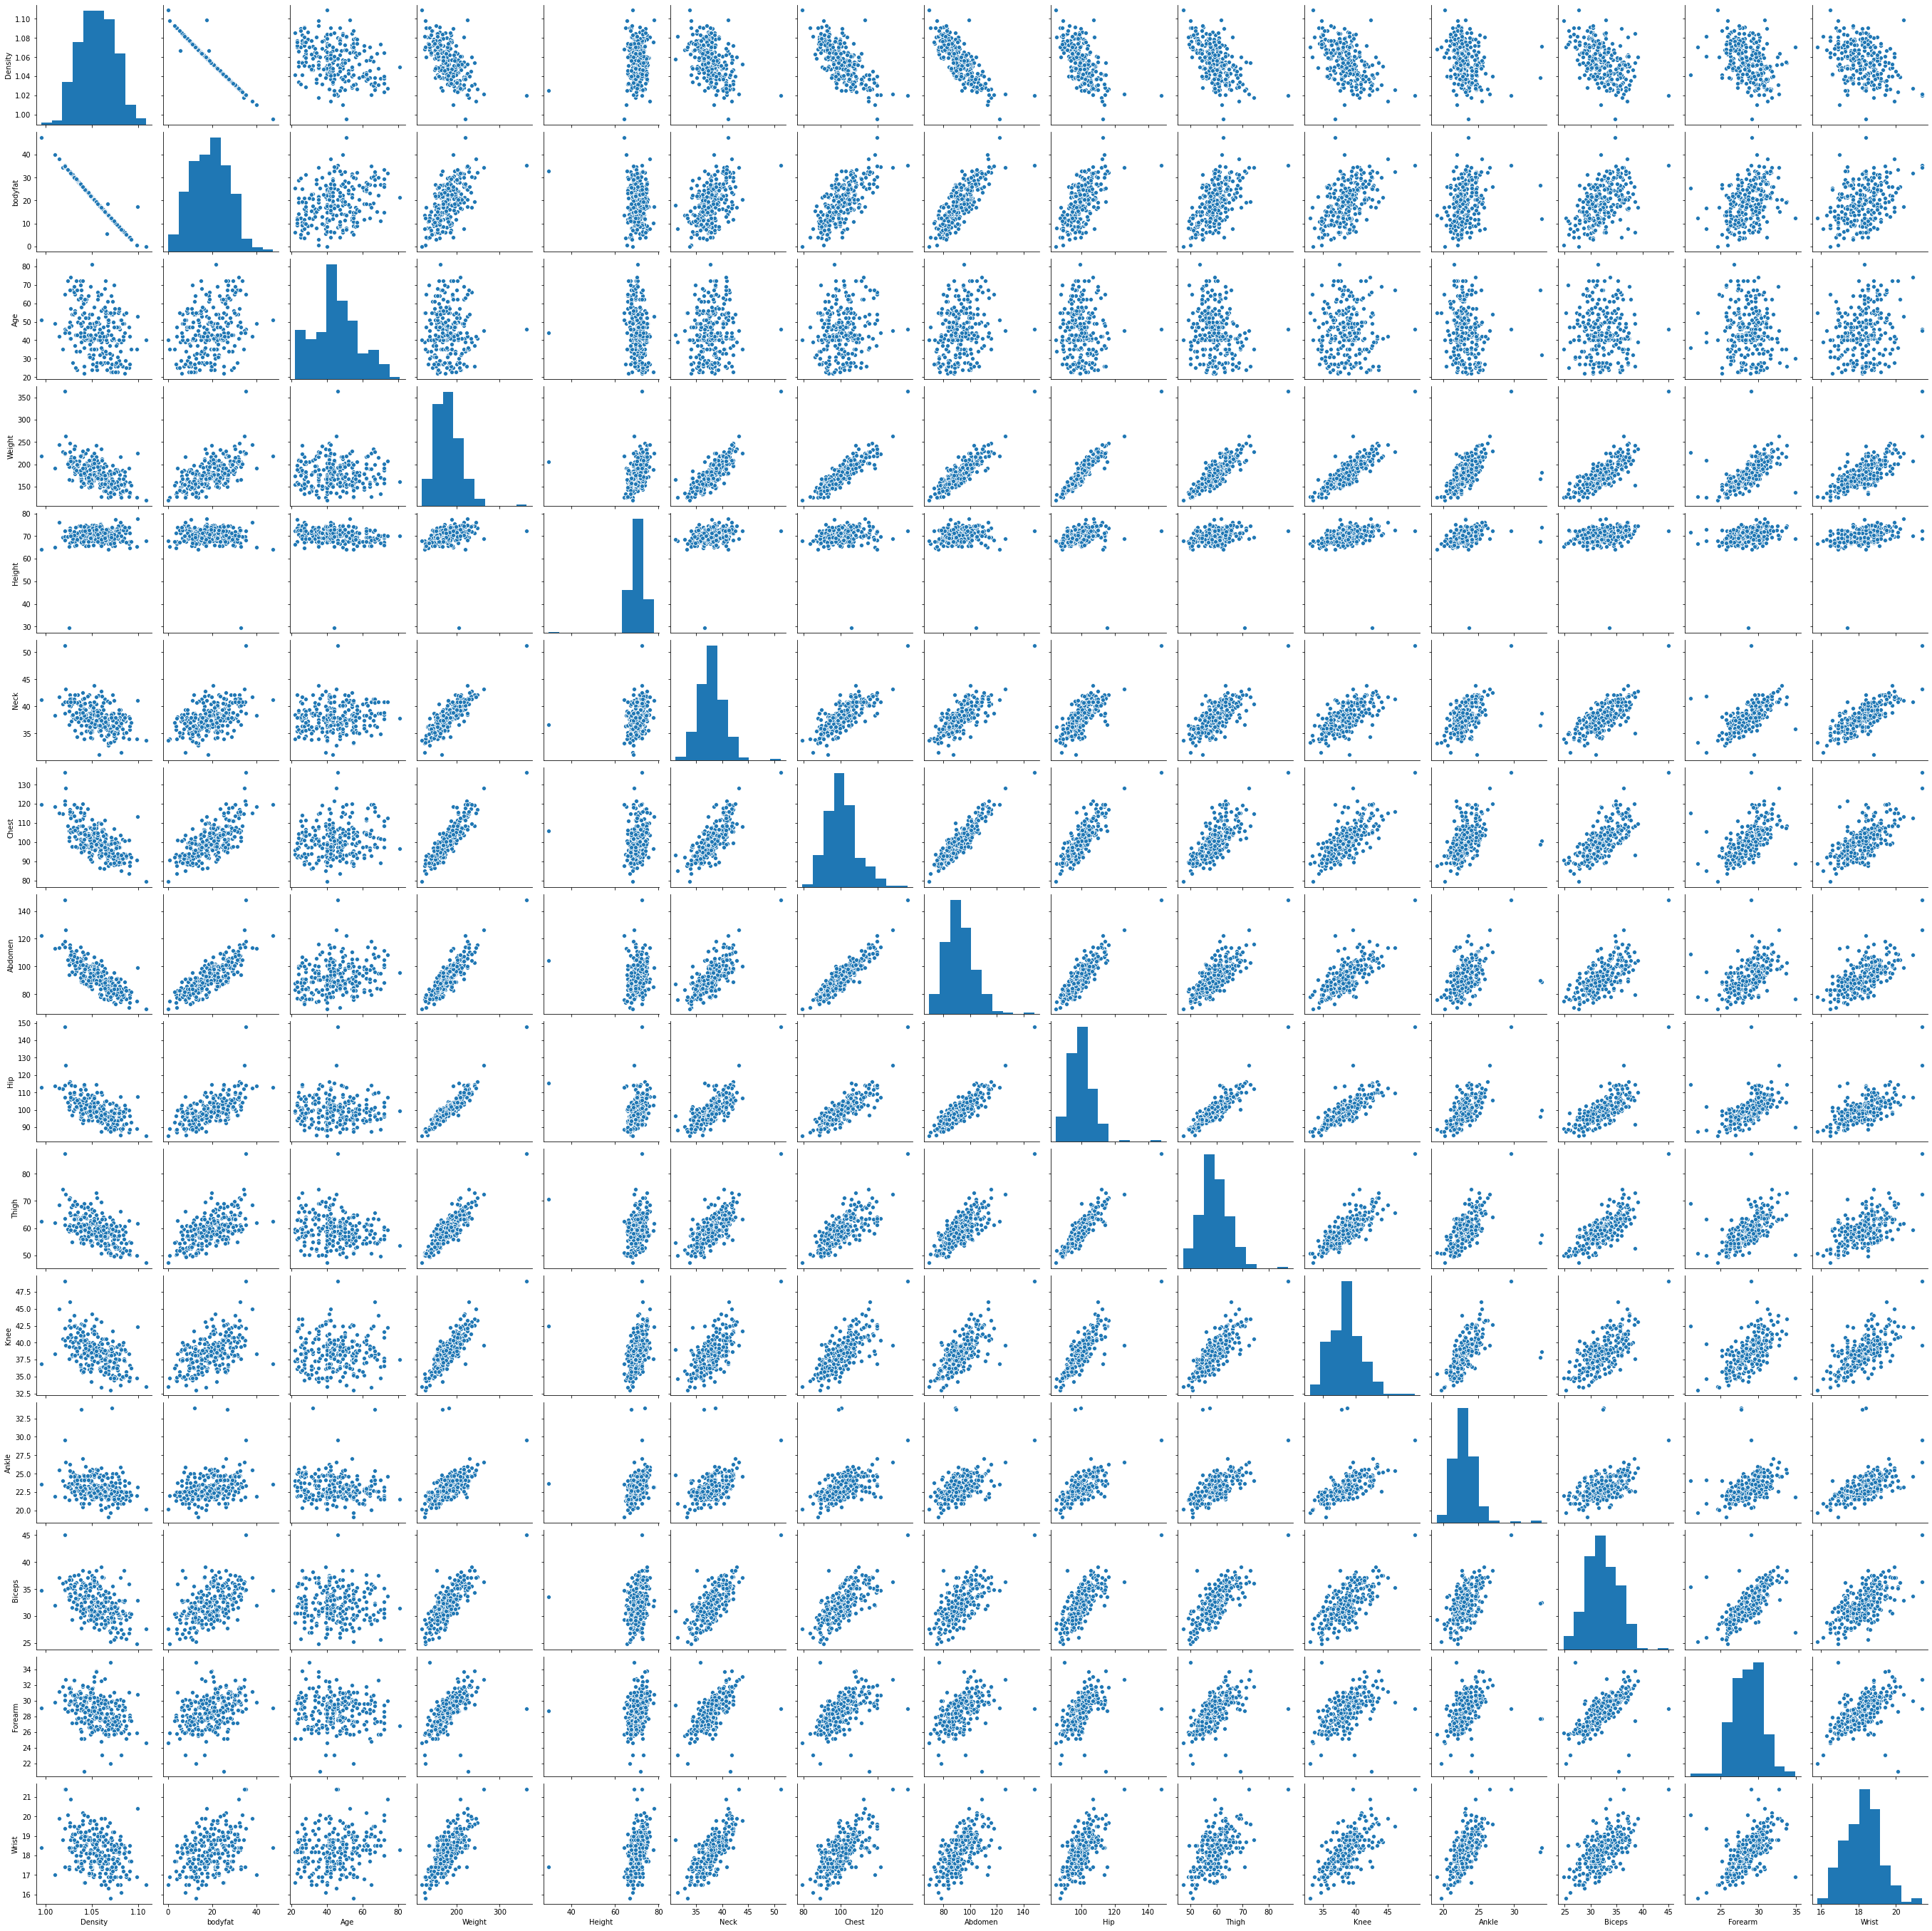

In [65]:
sns.pairplot(df)

In [2]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [45]:
x=df[["Ankle"]]  # -->independent
y=df["Knee"]

<module 'matplotlib.pyplot' from 'C:\\Users\\Krishna\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

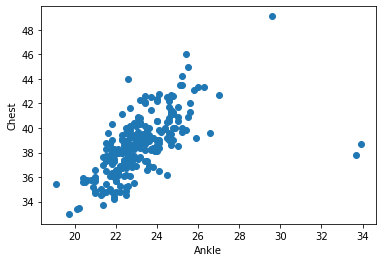

In [46]:
plt.scatter(x,y)
plt.xlabel("Ankle")
plt.ylabel("Chest")
plt

In [56]:
xtrain,ytrain,xtest,ytest=train_test_split(x,y,test_size=0.5)
#xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
# step 3
lin_model=LinearRegression()
lin_model.fit(x,y)

LinearRegression()

In [57]:
ypred=lin_model.predict(x)

In [58]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,37.3,37.544034
1,37.3,38.849496
2,38.9,39.371681
3,37.3,38.327312
4,42.2,39.371681
...,...,...
247,34.8,37.195911
248,40.8,38.675435
249,37.3,37.195911
250,41.6,38.240281


In [59]:
lin_model.score(x,y)

0.37406459181863216

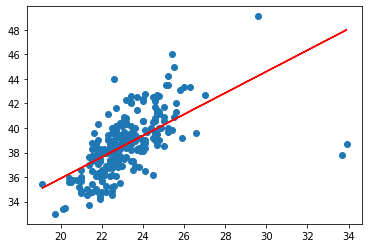

In [60]:
plt.scatter(x,y)
plt.plot(x,ypred,color="r")

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly_trans=PolynomialFeatures(degree=25)
x_poly=poly_trans.fit_transform(x)

In [62]:
x_poly

array([[1.00000000e+00, 2.19000000e+01, 4.79610000e+02, ...,
        6.76417198e+30, 1.48135366e+32, 3.24416453e+33],
       [1.00000000e+00, 2.34000000e+01, 5.47560000e+02, ...,
        3.10430740e+31, 7.26407932e+32, 1.69979456e+34],
       [1.00000000e+00, 2.40000000e+01, 5.76000000e+02, ...,
        5.55723240e+31, 1.33373578e+33, 3.20096586e+34],
       ...,
       [1.00000000e+00, 2.15000000e+01, 4.62250000e+02, ...,
        4.42674574e+30, 9.51750334e+31, 2.04626322e+33],
       [1.00000000e+00, 2.27000000e+01, 5.15290000e+02, ...,
        1.54381308e+31, 3.50445569e+32, 7.95511441e+33],
       [1.00000000e+00, 2.46000000e+01, 6.05160000e+02, ...,
        9.80635166e+31, 2.41236251e+33, 5.93441177e+34]])

In [63]:
poly_model=LinearRegression()
poly_model.fit(x_poly,y)
ypred=poly_model.predict(x_poly)

In [64]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,37.3,37.072227
1,37.3,39.238405
2,38.9,40.006168
3,37.3,38.386288
4,42.2,40.006168
...,...,...
247,34.8,36.516352
248,40.8,38.961184
249,37.3,36.516352
250,41.6,38.239880


In [65]:
poly_model.score(x_poly,y)

0.5675179208435477

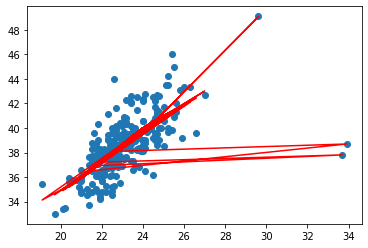

In [66]:
plt.scatter(x,y)
plt.plot(x,ypred,color="r")

In [22]:
df.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [31]:
x=df[["Neck"]]  # -->independent
y=df["bodyfat"]

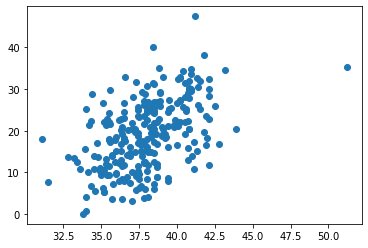

In [32]:
plt.scatter(x,y)